In [1]:
# Import all necessary libraries.
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Download the data base with pandas.
url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/yelp.csv'
yelp = pd.read_csv(url)

In [3]:
# Show the class distribution.
yelp.stars.value_counts().sort_index()

1     749
2     927
3    1461
4    3526
5    3337
Name: stars, dtype: int64

In [17]:
# Define features and labels, i.e., X and y.
X = yelp.text
y = yelp.stars

In [18]:
# Split X and y into training and validation sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
# Instantiate a CountVectorizer object.
vect = CountVectorizer(binary=True, stop_words='english', max_df=0.5, min_df=10, ngram_range=(1,3))

In [20]:
# Fit and transform X_train into X_train_dtm (document-term matrices - dtm).
X_train_dtm = vect.fit_transform(X_train)

In [21]:
# Transform X_test into X_test_dtm.
X_test_dtm = vect.transform(X_test)

In [22]:
# Instantiate a Bernoulli Naive Bayes model.
model = BernoulliNB(binarize=None)

In [23]:
# train the model using X_train_dtm
model.fit(X_train_dtm, y_train)

BernoulliNB(alpha=1.0, binarize=None, class_prior=None, fit_prior=True)

In [24]:
y_pred_class = model.predict(X_test_dtm)

In [25]:
metrics.accuracy_score(y_test, y_pred_class)

0.4588

In [26]:
y_test.value_counts()

4    898
5    826
3    374
2    221
1    181
Name: stars, dtype: int64

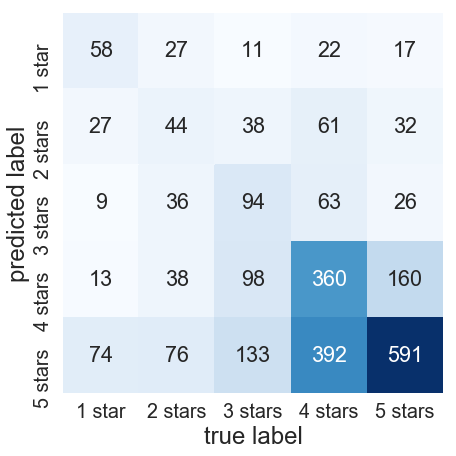

In [27]:
# Plot the confusion matrix
fig = plt.figure(figsize=(7,7))
mat = confusion_matrix(y_test, y_pred_class)
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['1 star','2 stars','3 stars','4 stars','5 stars'], yticklabels=['1 star','2 stars','3 stars','4 stars','5 stars'], cmap="Blues")
plt.xlabel('true label', fontsize=24)
plt.ylabel('predicted label', fontsize=24)
plt.show()